# U.S. Medical Insurance Costs

## This project is the introduction portfolio project from the CodeAcademy career path: data analyst (Machine Learning).

### Self created tasks for this project: 
    1) Find out the average age of the patients in the dataset.
    2) Analyze where a majority of the individuals are from. 
    3) Average charges between smokers vs. non-smokers. 
    4) Male vs female imsurace costs on average. 
    5) Figure out what the average age is for someone who has at least one child in this dataset. 
    6) How the number of children correlates with smoking for males and females.
   
  
  The purpose of this project is to showcase some basic dataframe functions, variable / value modifications and a few basic visualizations as well as a little bit of python knowledge.
  The other portfolio projects are more specific towards one domain, i.e. visualization / statistic / data wrangling / ML.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl


In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
for column in df.columns:
    globals()[column] = df[column]

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
print(smoker.unique())

['yes' 'no']


In [10]:
#Change smoker from float to int

df['smoker'] = pd.Series(map(lambda x: dict(yes=1, no=0)[x],
             df.smoker.values.tolist()), df.index)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [12]:
class DataFrameAnalyzer:
    def __init__(self, df):
        self.df = df

    def summary(self):
        """
        Display a summary of the DataFrame, including info, describe, and the first few rows.
        """
        print("DataFrame Info:")
        print(self.df.info())
        print("\nDataFrame Description:")
        print(self.df.describe())
        print("\nFirst 5 rows of the DataFrame:")
        print(self.df.head())

    def column_info(self, column_name):
        """
        Display information about a specific column in the DataFrame.
        """
        if column_name in self.df.columns:
            print(f"Column Name: {column_name}")
            print(f"Data Type: {self.df[column_name].dtype}")
            print(f"Number of Non-null Values: {self.df[column_name].count()}")
            print(f"Mean: {self.df[column_name].mean()}")
            print(f"Median: {self.df[column_name].median()}")
            print(f"Standard Deviation: {self.df[column_name].std()}")
        else:
            print(f"Column '{column_name}' not found in the DataFrame.")

    def missing_values(self):
        """
        Display the count of missing values in each column of the DataFrame.
        """
        missing_data = self.df.isnull().sum()
        print("Missing Values:")
        print(missing_data[missing_data > 0])

    def unique_values(self, column_name):
        """
        Display unique values in a specific column of the DataFrame.
        """
        if column_name in self.df.columns:
            unique_vals = self.df[column_name].unique()
            print(f"Unique values in '{column_name}':")
            for val in unique_vals:
                print(val)
        else:
            print(f"Column '{column_name}' not found in the DataFrame.")

In [13]:
analysis = DataFrameAnalyzer(df)

In [14]:
analysis.summary()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB
None

DataFrame Description:
               age          bmi     children       smoker       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918     0.204783  13270.422265
std      14.049960     6.098187     1.205493     0.403694  12110.011237
min      18.000000    15.960000     0.000000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000     0.000000   4740.287150
50%

In [15]:
# We can get more information using functions like .describe(), however combining functions together provides a better overview (in some cases), like we did in the class.
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338.000000,1338,1338.000000
unique,NaN,2,NaN,NaN,NaN,4,NaN
top,NaN,male,NaN,NaN,NaN,southeast,NaN
freq,NaN,676,NaN,NaN,NaN,364,NaN
mean,39.207025,NaN,30.663397,1.094918,0.204783,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,0.403694,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,0.000000,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,0.000000,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,0.000000,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,0.000000,NaN,16639.912515


In [191]:
#Using the column_info we can find all basic information for each variable (column), as long as the column isn't a string.
analysis.column_info('age')

Column Name: age
Data Type: int64
Number of Non-null Values: 1338
Mean: 39.20702541106129
Median: 39.0
Standard Deviation: 14.049960379216172


In [192]:
analysis.missing_values()
#There are no missing values in the dataset

Missing Values:
Series([], dtype: int64)


In [193]:
# Check all the unique values in a column, i.e. sex. 
analysis.unique_values('sex')
# We find there are no null values and all values are either female or male, there is thus no need to clean the column.

Unique values in 'sex':
female
male


In [194]:
analysis.unique_values('region')
# This is a curious variable, normally we'd expect: {north, south, east and west} but here the values are combined, we can split these to get more interesting comparisons

Unique values in 'region':
southwest
southeast
northwest
northeast


In [195]:
# To split the region we create 2 new variables: direction and area. We do not drop the original variable, because it can be used later during analysis.
df['direction'] = df['region'].str[:-4]  # Remove the last 4 characters
df['area'] = df['region'].str[-4:]  # Get the last 4 characters

In [196]:
print(df)

      age     sex     bmi  children  smoker     region      charges direction  \
0      19  female  27.900         0       1  southwest  16884.92400     south   
1      18    male  33.770         1       0  southeast   1725.55230     south   
2      28    male  33.000         3       0  southeast   4449.46200     south   
3      33    male  22.705         0       0  northwest  21984.47061     north   
4      32    male  28.880         0       0  northwest   3866.85520     north   
...   ...     ...     ...       ...     ...        ...          ...       ...   
1333   50    male  30.970         3       0  northwest  10600.54830     north   
1334   18  female  31.920         0       0  northeast   2205.98080     north   
1335   18  female  36.850         0       0  southeast   1629.83350     south   
1336   21  female  25.800         0       0  southwest   2007.94500     south   
1337   61  female  29.070         0       1  northwest  29141.36030     north   

      area  
0     west  
1

In [197]:
# Task 1: Find out the average age of the patients in the dataset.
# Approach: we can do this using .mean(), manually, or call the function column_info in the class where .mean() was also used.

print(age.mean()) # Approach 1
print(analysis.column_info('age')) #Approach 2


39.20702541106129
Column Name: age
Data Type: int64
Number of Non-null Values: 1338
Mean: 39.20702541106129
Median: 39.0
Standard Deviation: 14.049960379216172
None


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


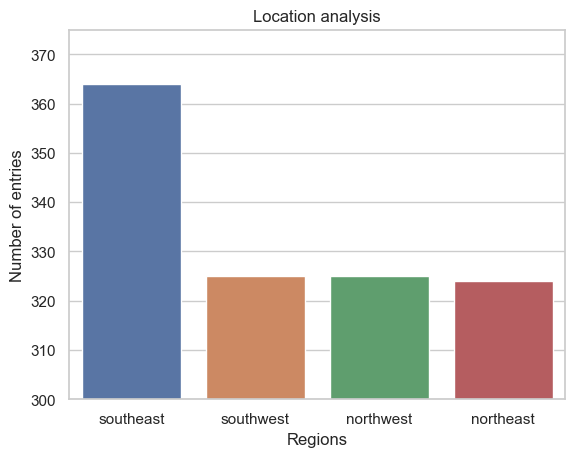

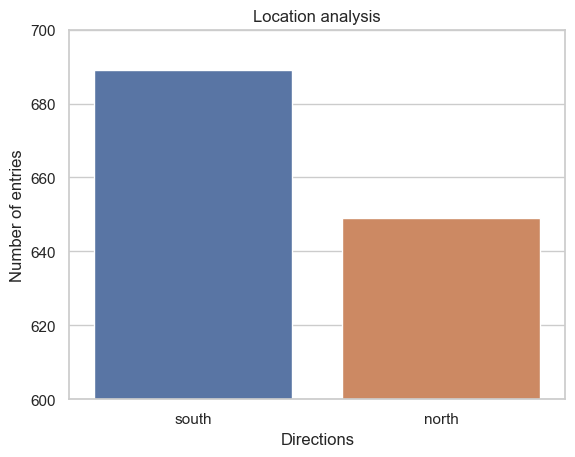

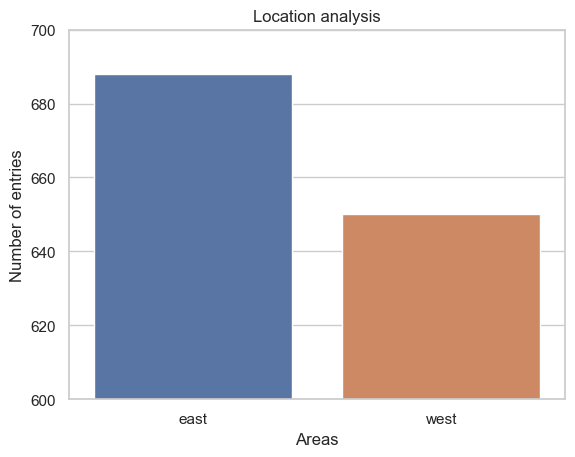

In [198]:
# Task 2: 2) Analyze where a majority of the individuals are from.
# Approach: We will do this by looking at both the orginial variable: region, and comparing it to direction/area.

region_count = region.value_counts()
print(region_count)


order = region.value_counts().index
plt.title('Location analysis')
sns.countplot( data = df, x= 'region', order=order)
plt.ylim([300,375])
plt.xlabel('Regions')
plt.ylabel('Number of entries')
plt.show()


order_direction = df['direction'].value_counts().index
plt.title('Location analysis')
sns.countplot( data = df, x= 'direction', order=order_direction)
plt.ylim([600,700])
plt.xlabel('Directions')
plt.ylabel('Number of entries')
plt.show()


order_area = df['area'].value_counts().index
plt.title('Location analysis')
sns.countplot( data = df, x= 'area', order=order_area)
plt.ylim([600,700])
plt.xlabel('Areas')
plt.ylabel('Number of entries')
plt.show()

# Conclusion: We can conclude that a majority of the people are from the southeast, there are more people from the south than there are from the north, and there are more people from the east than there are from the west.

In [199]:
# Task 3: Average charges between smokers vs. non-smokers.
# Approach: Calculate mean for smoker = 1 and smoker = 0. Calculate the difference and round to two digits. Print all and show the difference.

charges_smoker = df.loc[df['smoker'] == 1 , 'charges'].mean()
charges_non_smoker = df.loc[df['smoker'] == 0 , 'charges'].mean()

difference_charges_smokers = round(charges_smoker - charges_non_smoker, 2)

print(charges_smoker)
print(charges_non_smoker)
print("The difference in charges between a smoker and a non_smoker is: $" + str(difference_charges_smokers))

32050.23183153284
8434.268297856204
The difference in charges between a smoker and a non_smoker is: $23615.96


In [200]:
# Task 4: Male vs female imsurace costs on average.
# Approach: Basically the same as Task3. 

male_average = df.loc[sex == 'male', 'charges'].mean()
female_average = df.loc[sex == 'female', 'charges'].mean()

difference_charges_sex = round(male_average - female_average, 2 )

print(male_average)
print(female_average)
print("The difference in charges between male and female is: $" + str(difference_charges_sex))

13956.751177721893
12569.578843835347
The difference in charges between male and female is: $1387.17


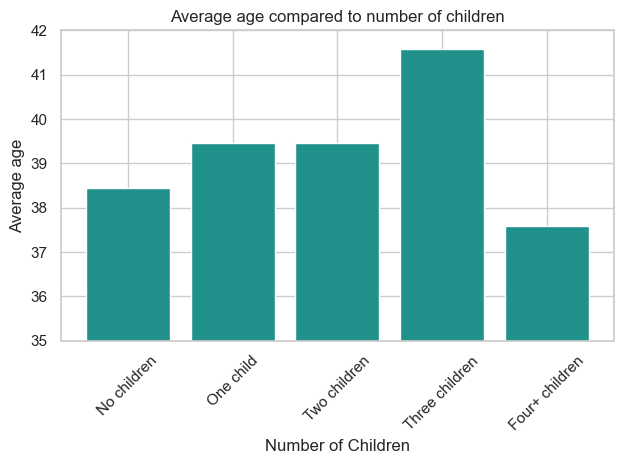

In [203]:
# Task 5: Figure out what the average age is for someone who has at least one child in this dataset. 
# Approach: Similar to previous tasks, take the average age of people with one kid. We can compare this age to different number of kids.

age_one_child = df.loc[children == 1, 'age'].mean().round(2)
age_two_child = df.loc[children == 2, 'age'].mean().round(2)
age_three_child = df.loc[children == 3, 'age'].mean().round(2)
age_more_child = df.loc[children >= 4, 'age'].mean().round(2)
age_no_child = df.loc[children == 0, 'age'].mean().round(2)

values = [age_no_child, age_one_child, age_two_child, age_three_child, age_more_child]
labels = [ 'No children', 'One child', 'Two children', 'Three children', 'Four+ children']
plt.bar(labels, values, color=plt.cm.viridis(0.5) )
plt.xlabel('Number of Children')
plt.ylabel('Average age')
plt.ylim([35,42])
plt.title('Average age compared to number of children')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


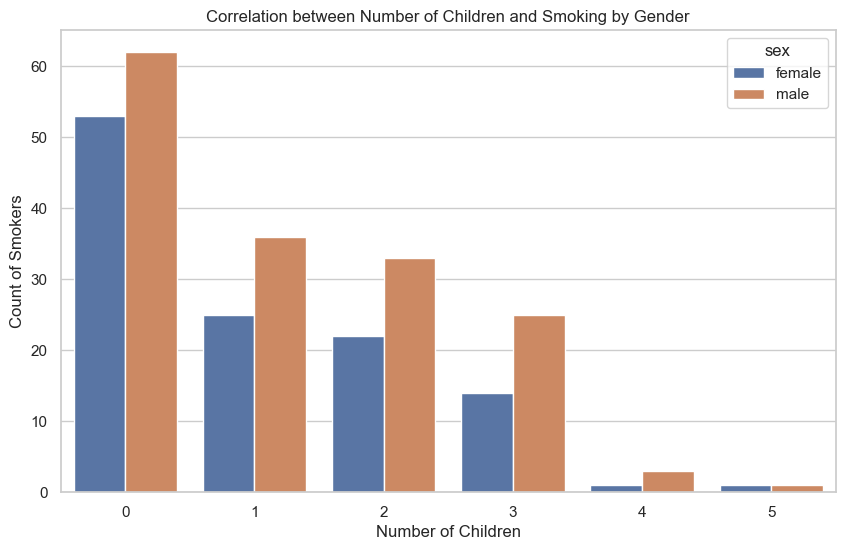

In [202]:
# Task 6: How the number of children correlates with smoking for males and females.
# Approach: Group the appropriate variables together, create a pivot table for the visualization, plot the variables.

# Group the data by gender, smoking status, and number of children
grouped = df.groupby(['sex', 'smoker', 'children']).size().reset_index(name='count')

# Create a pivot table for better visualization
pivot_table = grouped.pivot_table(index=['sex', 'children'], columns='smoker', values='count', fill_value=1)

# Create a bar plot to visualize the correlation
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table.reset_index(), x='children', y=1, hue='sex')
plt.title('Correlation between Number of Children and Smoking by Gender')
plt.xlabel('Number of Children')
plt.ylabel('Count of Smokers')
plt.show()